Библиотеки:

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00


In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [4]:
# загружаем обработанный дф
df = pd.read_csv('/content/drive/MyDrive/for_model_ver2.csv', sep = ',')
df.head(10)

,Unnamed: 0,location,floor,floors_count,rooms_count,total_meters,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground,price_per_square_meter
0,1,27,1,9,1,33.0,1975.0,1,0,0,18.0,6.0,2.70,160,1,125757.0
1,4,27,4,7,1,25.9,2009.0,1,0,2,20.0,5.0,3.50,671,0,115830.0
2,9,27,6,9,2,42.7,1980.0,1,2,2,29.7,5.6,2.70,831,0,93442.0
3,10,27,1,5,2,42.8,1990.0,1,1,2,24.9,6.0,2.50,711,0,70070.0
4,13,27,1,3,1,25.3,2015.0,1,2,0,14.1,6.2,2.80,599,0,98814.0
5,17,27,2,4,1,41.4,1975.0,1,1,2,20.0,7.0,2.82,1418,0,67632.0
6,18,27,2,2,1,31.3,1970.0,1,0,2,26.3,5.0,2.82,563,0,86261.0
7,19,27,5,5,1,31.0,1984.0,1,1,2,15.0,7.3,2.82,124,0,99677.0
8,23,27,6,6,1,38.9,2010.0,1,2,0,16.0,10.0,2.80,432,0,71979.0
9,26,27,8,10,3,64.0,1992.0,1,2,2,55.0,9.0,2.80,899,0,116406.0


In [6]:
# дропаем вторую колонку
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [7]:
# смотрим размер дф
df.shape

(3291, 15)

3315 строк и 15 колонок

In [8]:
# удаляем колонку с целевой переменной
df.drop(['price_per_square_meter'], axis = 1)

,location,floor,floors_count,rooms_count,total_meters,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,27,1,9,1,33.0,1975.0,1,0,0,18.0,6.0,2.70,160,1
1,27,4,7,1,25.9,2009.0,1,0,2,20.0,5.0,3.50,671,0
2,27,6,9,2,42.7,1980.0,1,2,2,29.7,5.6,2.70,831,0
3,27,1,5,2,42.8,1990.0,1,1,2,24.9,6.0,2.50,711,0
4,27,1,3,1,25.3,2015.0,1,2,0,14.1,6.2,2.80,599,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,20,9,10,2,53.0,2005.0,1,1,2,28.0,11.0,2.60,1255,1
3287,20,17,17,2,52.2,2013.0,1,1,2,27.0,10.9,2.80,8,1
3288,20,2,7,2,60.0,2017.0,1,0,4,35.0,18.0,2.85,1057,1
3289,20,8,14,2,69.7,2018.0,1,0,0,38.0,10.5,2.82,1238,1


# Разбиение датасета на обучающую и тестовую выборки

In [9]:
# х - данные без целевой переменной
X = np.array(df[df._get_numeric_data().columns].drop('price_per_square_meter', axis=1))
# у - целевая переменная
y = np.array(df['price_per_square_meter'])

Проверка:

In [10]:
X

array([[2.700e+01, 1.000e+00, 9.000e+00, ..., 2.700e+00, 1.600e+02,
        1.000e+00],
       [2.700e+01, 4.000e+00, 7.000e+00, ..., 3.500e+00, 6.710e+02,
        0.000e+00],
       [2.700e+01, 6.000e+00, 9.000e+00, ..., 2.700e+00, 8.310e+02,
        0.000e+00],
       ...,
       [2.000e+01, 2.000e+00, 7.000e+00, ..., 2.850e+00, 1.057e+03,
        1.000e+00],
       [2.000e+01, 8.000e+00, 1.400e+01, ..., 2.820e+00, 1.238e+03,
        1.000e+00],
       [2.000e+01, 3.000e+00, 6.000e+00, ..., 2.750e+00, 1.289e+03,
        1.000e+00]])

In [11]:
y

array([125757., 115830.,  93442., ..., 199166., 163558., 188235.])

In [12]:
# стандартизация данных
X = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [13]:
X

array([[ 0.95270508, -1.20546422, -0.73549253, ..., -0.39591349,
        -1.4244811 ,  0.63467574],
       [ 0.95270508, -0.6616669 , -1.02184128, ...,  3.2622638 ,
        -0.26929207, -1.57560772],
       [ 0.95270508, -0.29913535, -0.73549253, ..., -0.39591349,
         0.09241095, -1.57560772],
       ...,
       [ 0.39435902, -1.02419845, -1.02184128, ...,  0.28999475,
         0.60331646,  0.63467574],
       [ 0.39435902,  0.0633962 , -0.01962068, ...,  0.1528131 ,
         1.012493  ,  0.63467574],
       [ 0.39435902, -0.84293267, -1.16501565, ..., -0.16727741,
         1.12778584,  0.63467574]])

Разбиваем на обучающую и тестовую выборки в пропорции 70 на 30

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Размеры обучающей и тестовой выборок:

In [15]:
print(X_train.shape, X_test.shape)

(2303, 14) (988, 14)


# Построение моделей и обучение

## моделька №1

Используем CatBoostRegressor

In [16]:
from catboost import CatBoostRegressor



---

MAE

In [163]:
model_1 = CatBoostRegressor(learning_rate=0.02, loss_function='MAE', depth=8, n_estimators=1800)
model_1.fit(X_train, y_train, verbose=3)

0:	learn: 58222.3755021	total: 5.09ms	remaining: 9.15s
3:	learn: 56946.7529309	total: 17.5ms	remaining: 7.85s
6:	learn: 55763.7941345	total: 33.6ms	remaining: 8.6s
9:	learn: 54636.1321568	total: 49.1ms	remaining: 8.79s
12:	learn: 53566.7723156	total: 65.4ms	remaining: 8.98s
15:	learn: 52603.0357810	total: 80.8ms	remaining: 9.01s
18:	learn: 51636.1544969	total: 96.5ms	remaining: 9.05s
21:	learn: 50726.5968638	total: 112ms	remaining: 9.03s
24:	learn: 50056.2147235	total: 123ms	remaining: 8.73s
27:	learn: 49308.5702397	total: 138ms	remaining: 8.76s
30:	learn: 48427.9483168	total: 154ms	remaining: 8.78s
33:	learn: 47856.7501590	total: 169ms	remaining: 8.79s
36:	learn: 47145.7250065	total: 185ms	remaining: 8.8s
39:	learn: 46589.4088691	total: 206ms	remaining: 9.05s
42:	learn: 46073.6753590	total: 223ms	remaining: 9.1s
45:	learn: 45569.2982417	total: 244ms	remaining: 9.29s
48:	learn: 44929.5757857	total: 266ms	remaining: 9.5s
51:	learn: 44416.5382190	total: 286ms	remaining: 9.62s
54:	learn: 

In [184]:
from sklearn.metrics import r2_score

In [193]:
# прогноз на основе тестовой выборки
y_pred1 = model_1.predict(X_test)
# считаем метрики качества
mae = mean_absolute_error(y_test, y_pred1)
mse = mean_squared_error(y_test, y_pred1)
rmse = mean_squared_error(y_test, y_pred1, squared=False)
# коэффициент детерминации — доля дисперсии зависимой переменной,
# объясняемая рассматриваемой моделью зависимости. чем ближе её значение к 1, тем
r2 = r2_score(y_test, y_pred1)

print(f'MAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nr2: {r2}')

MAE: 37853.09429008655
MSE: 6050974716.434976
RMSE: 77788.01139272668
r2: 0.5637364978113977


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


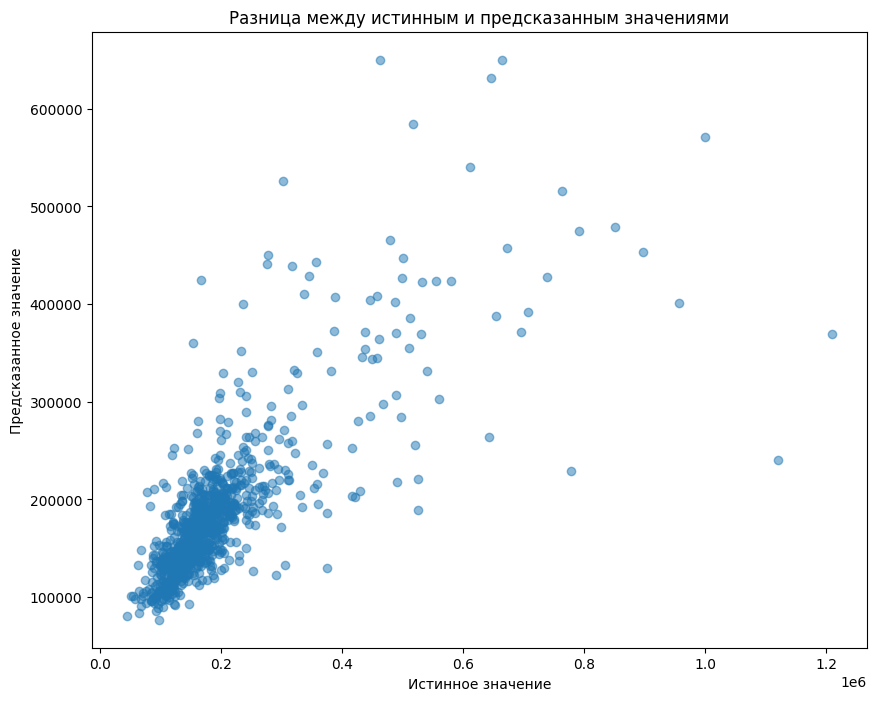

In [194]:
# визуализируем разницу между предсказанным и действительным
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred1, alpha=0.5)
plt.xlabel('Истинное значение')
plt.ylabel('Предсказанное значение')
plt.title('Разница между истинным и предсказанным значениями')
plt.show()

как-то плохо обучилось

(это наименьшие значения метрик, которые у меня получились, было ещё хуже😔)

### Функция с готовой моделькой

In [201]:
def predict_price_per_square_meter1(model, info_kv):
  info_kv_df = pd.DataFrame(info_kv, index=[0])
  predict_price_sm = model.predict(info_kv_df)
  return predict_price_sm[0]


info_kv = {
    'location': 20,
    'floor': 9,
    'floors_count': 10,
    'rooms_count': 2,
    'total_meters': 53.0,
    'year_of_construction': 2005,
    'object_type': 1,
    'have_loggia': 1,
    'parking_type': 2,
    'living_meters': 28.0,
    'kitchen_meters': 11.0,
    'ceiling_height': 2.60,
    'street': 1255,
    'underground': 1
}

price_sm = predict_price_per_square_meter1(model_1, info_kv)
print(f'Цена за квадратный метр: {price_sm}')

Цена за квадратный метр: 414475.31421384483


## моделька 2

Используем RandomForest для регрессии

In [176]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
model_2 = RandomForestRegressor(n_estimators=100, random_state=42)

# обучение модельки
model_2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [195]:
# прогноз на основе тестовой выборки
y_pred2 = model_2.predict(X_test)

# метрики качества
mae = mean_absolute_error(y_test, y_pred2)
mse = mean_squared_error(y_test, y_pred2)
rmse = mean_squared_error(y_test, y_pred2, squared=False)
r2 = r2_score(y_test, y_pred2)

print(f'MAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nr2: {r2}')

MAE: 39368.7197874494
MSE: 5487717625.581185
RMSE: 74079.13083710679
r2: 0.6043462379944161


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


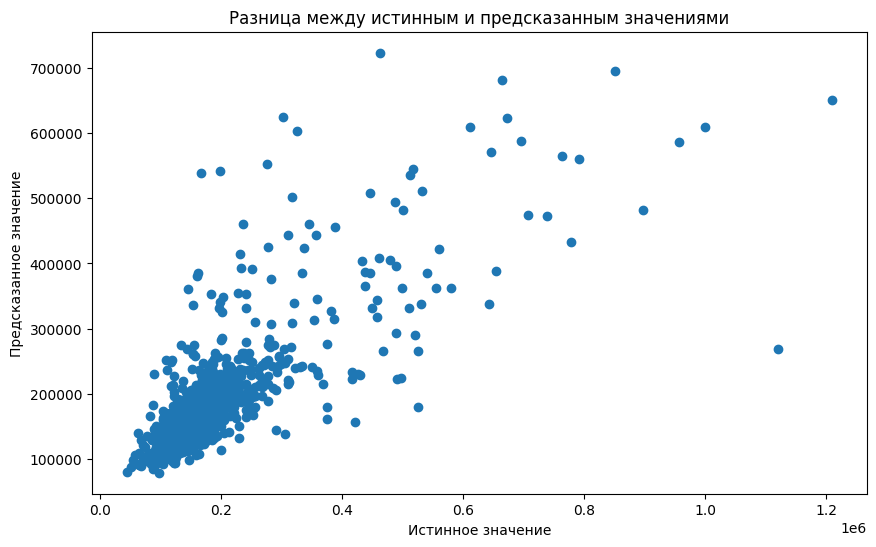

In [198]:
# График фактических vs предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test, y=y_pred2)
plt.xlabel('Истинное значение')
plt.ylabel('Предсказанное значение')
plt.title('Разница между истинным и предсказанным значениями')
plt.show()

### Функция с готовой моделькой

In [202]:
def predict_price_per_square_meter2(model, info_kv):
  info_kv_df = pd.DataFrame(info_kv, index=[0])
  predict_price_sm = model.predict(info_kv_df)
  return predict_price_sm[0]


info_kv = {
    'location': 20,
    'floor': 9,
    'floors_count': 10,
    'rooms_count': 2,
    'total_meters': 53.0,
    'year_of_construction': 2005,
    'object_type': 1,
    'have_loggia': 1,
    'parking_type': 2,
    'living_meters': 28.0,
    'kitchen_meters': 11.0,
    'ceiling_height': 2.60,
    'street': 1255,
    'underground': 1
}

price_sm = predict_price_per_square_meter2(model_2, info_kv)
print(f'Цена за квадратный метр: {price_sm}')

Цена за квадратный метр: 443833.55


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


image.png

Информация в info_kv взята из этой строчки, последняя колонка - цена за квадратный метр ↑

Итог: модельки не получились :(